# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [22]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [23]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,269179.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.201134,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.400849,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


In [24]:
df_flights.isnull()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
271936,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
271937,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
271938,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [26]:
df_flights_nan = df_flights[df_flights.isnull().any(axis=1)]
df_flights_nan

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,NaN,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,NaN,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,NaN,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,NaN,1540,0,1,1


In [27]:
df_flights_nan[df_flights_nan['DepDelay'] == 0].describe()
# There are 2761 entries with DepDelay = 0 but DepDel15 = NaN, we should replace these with

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,2761.0,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000,2761.000000,2761.0,0.0,2761.000000,2761.0,2761.0,2761.0
mean,2013.0,6.455632,15.572619,3.604853,12757.763129,12708.952553,1431.354944,0.0,NaN,1587.419051,0.0,1.0,1.0
std,0.0,1.759942,8.092708,1.748487,1426.462196,1408.166022,457.450773,0.0,NaN,485.236232,0.0,0.0,0.0
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,5.000000,0.0,NaN,5.000000,0.0,1.0,1.0
25%,2013.0,5.000000,10.000000,2.000000,11298.000000,11298.000000,1050.000000,0.0,NaN,1229.000000,0.0,1.0,1.0
50%,2013.0,6.000000,16.000000,4.000000,12892.000000,12892.000000,1500.000000,0.0,NaN,1645.000000,0.0,1.0,1.0
75%,2013.0,8.000000,22.000000,5.000000,13930.000000,13930.000000,1815.000000,0.0,NaN,2003.000000,0.0,1.0,1.0
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,0.0,NaN,2359.000000,0.0,1.0,1.0


In [28]:
df_flights.DepDel15 = df_flights.DepDel15.fillna(0.0)
df_flights[df_flights.isnull().any(axis=1)]
# Data is now clean

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled


{'whiskers': [<matplotlib.lines.Line2D at 0x1e7d38ca250>,
 'caps': [<matplotlib.lines.Line2D at 0x1e7d38ca790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e7d38bbf70>],
 'medians': [<matplotlib.lines.Line2D at 0x1e7d38cacd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e7d38caf70>],
 'means': []}

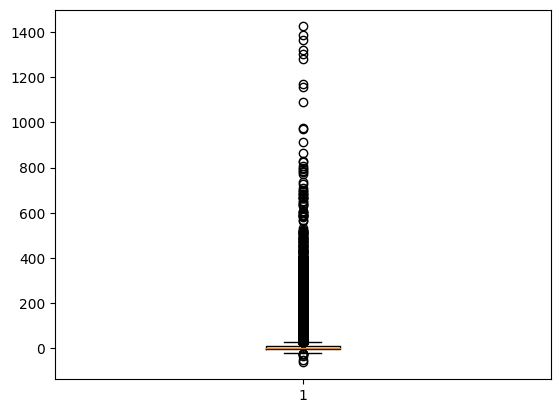

In [29]:
from matplotlib import pyplot as plt

var_data = df_flights['DepDelay']

plt.boxplot(var_data)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e7b877ecd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e7b87a75b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e7b87654f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e7c381b2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e7c381bdc0>],
 'means': []}

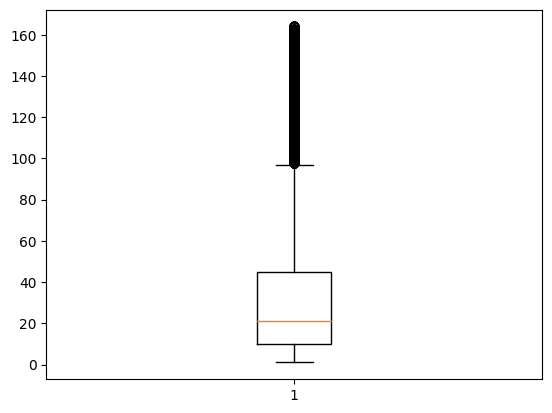

In [43]:
# Filter out points with DepDelay < 0 or > largest quantile
q01 = df_flights.DepDelay.quantile(0.99)
df_flights = df_flights[df_flights.DepDelay<q01]
df_flights = df_flights[df_flights.DepDelay>0.0]
plt.boxplot(df_flights['DepDelay'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e7d3bf8250>,
 'caps': [<matplotlib.lines.Line2D at 0x1e7d3bf8790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e7d3becf70>],
 'medians': [<matplotlib.lines.Line2D at 0x1e7d3bf8cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e7d3bf8f70>],
 'means': []}

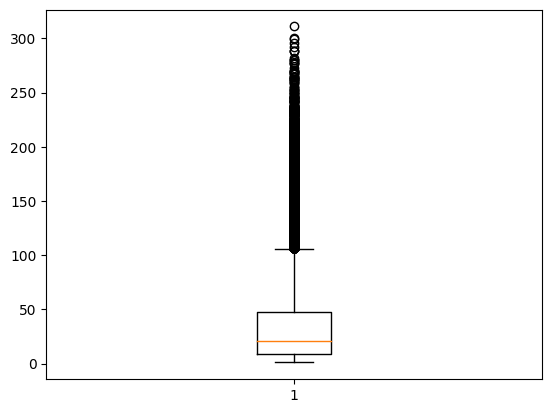

In [41]:
# Filter out points with ArrDelay < 0
df_flights = df_flights[df_flights.ArrDelay>0.0]
plt.boxplot(df_flights['ArrDelay'])


In [44]:
df_flights.describe()
# Mean DepDelay = 33.406138
# Mean ArrDelay = 33.142038

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,78296.0,78296.000000,78296.000000,78296.000000,78296.000000,78296.000000,78296.000000,78296.000000,78296.000000,78296.000000,78296.000000,78296.000000,78296.0
mean,2013.0,6.871743,15.915947,3.887146,12699.193433,12777.767063,1472.258442,33.406138,0.630211,1641.147990,33.142038,0.603032,0.0
std,0.0,1.893458,8.589707,1.948211,1487.182091,1507.067008,431.811930,33.864607,0.482751,478.299223,35.149172,0.489272,0.0
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0
25%,2013.0,5.000000,9.000000,2.000000,11292.000000,11292.000000,1135.000000,10.000000,0.000000,1330.000000,8.000000,0.000000,0.0
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1515.000000,21.000000,1.000000,1720.000000,20.000000,1.000000,0.0
75%,2013.0,8.000000,23.000000,5.000000,13930.000000,14100.000000,1825.000000,45.000000,1.000000,2020.000000,45.000000,1.000000,0.0
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,164.000000,1.000000,2359.000000,280.000000,1.000000,0.0


<AxesSubplot: title={'center': 'ArrDelay'}, xlabel='Carrier'>

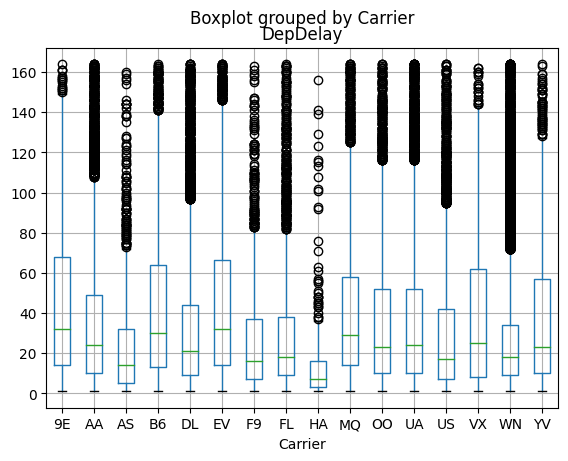

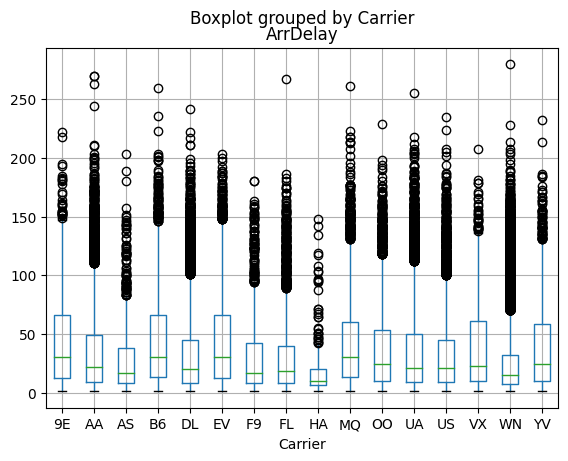

In [50]:
df_flights.boxplot('ArrDelay', by='Carrier')
# No obvious pattern

<AxesSubplot: title={'center': 'ArrDelay'}, xlabel='DayOfWeek'>

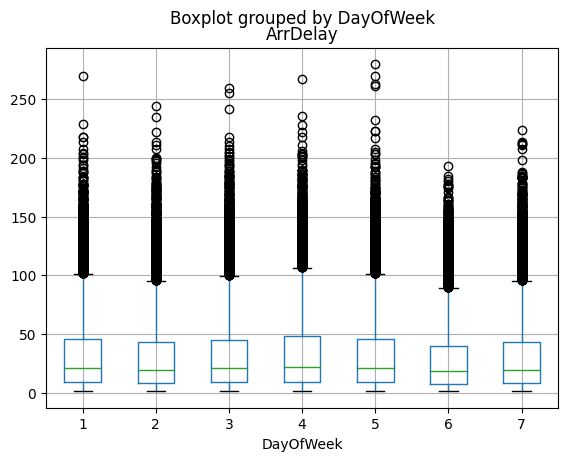

In [51]:
df_flights.boxplot('ArrDelay', by='DayOfWeek')
# No obvious pattern

<AxesSubplot: title={'center': 'DepDelay'}, xlabel='OriginAirportID'>

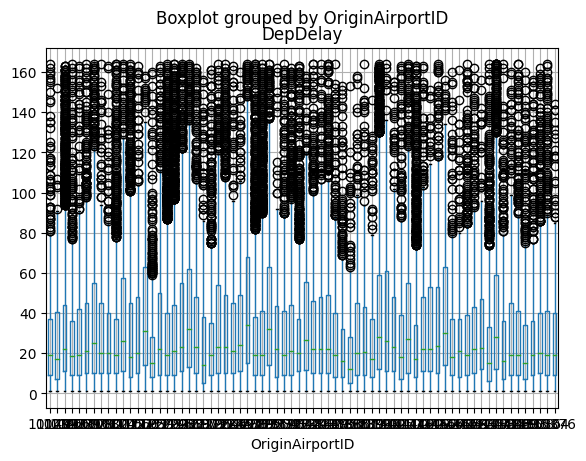

In [52]:
df_flights.boxplot('DepDelay', by='OriginAirportID')
# No obvious pattern

<AxesSubplot: title={'center': 'ArrDelay'}, xlabel='DepDel15'>

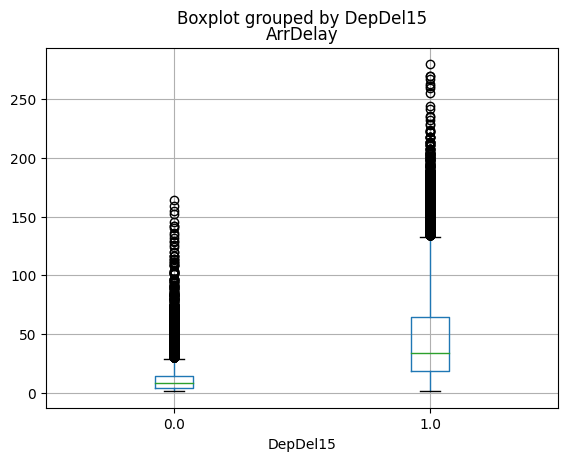

In [54]:
df_flights.boxplot('ArrDelay', by='DepDel15')
# Yes, A delay in departure does usually mean a significant delay in arrival

In [98]:
#Which route (from origin airport to destination airport) has the most **late** arrivals?
# Group by OriginAirportID, DestAirportID
count = df_flights[df_flights['ArrDel15'] == 1].groupby(['OriginAirportID', 'DestAirportID']).count()
count.where(count["Year"] == count["Year"].max()).dropna(axis=0, how='any')

# 12892 -> 14771

,,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportName,OriginCity,OriginState,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
OriginAirportID,DestAirportID,,,,,,,,,,,,,,,,,,
12892,14771,257.0,257.0,257.0,257.0,257.0,257.0,257.0,257.0,257.0,257.0,257.0,257.0,257.0,257.0,257.0,257.0,257.0,257.0


In [99]:
# Which route has the highest average arrival delay?
# Group by OriginAirportID, DestAirportID
mean = df_flights[df_flights['ArrDel15'] == 1].groupby(['OriginAirportID', 'DestAirportID']).mean()
mean.where(mean["ArrDelay"] == mean["ArrDelay"].max()).dropna(axis=0, how='any')

# 10529 -> 11618

C:\Users\Alexander\AppData\Local\Temp\ipykernel_10680\2819148432.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = df_flights[df_flights['ArrDel15'] == 1].groupby(['OriginAirportID', 'DestAirportID']).mean()


,,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
OriginAirportID,DestAirportID,,,,,,,,,,,
10529,11618,2013.0,5.25,22.0,4.0,1406.75,132.5,1.0,1513.75,146.0,1.0,0.0
